##### 필요 라이브러리

 - java 1.7 이상필요(SQL 수업시 이미 설치완료됨 ) 
 - pip install tensorflow 텐서플로우 
 - pip install gensim 젠심 
 - pip install scikit-learn 
 - pip install jupyter notebook
 - pip install nltk 
    -> python 접속 후 
     - import nltk  
     - nltk.download() 
    : 약 1기가정도 데이터 다운로드 화면 나옴 

 - pip install kss (한국어 문장토큰화)


- pip install konlpy
  - 형태소 분석기
     - from konlpy.tag import Okt
     - from konlpy.tag import Kkma

     - okt = Okt() 
     - kkma = Kkma()

    ** mecab 형태소 분석기가 성능 및 처리속도에서 최고이나 설치하기 난해함 

In [215]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter 
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split


In [216]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [217]:
# 뉴스분석 가져오기
total_data = pd.read_csv('c:/users/crid2/nl_test/22_news_title.csv')

In [218]:
# 생긴 인덱스 삭제 
total_data = total_data.drop('Unnamed: 0' , axis=1)
# 라벨 3만 삭제 
label0_idx = total_data.index[(total_data['label'] == 3 )]
total_data = total_data.drop(label0_idx , axis= 0 )


total_data

,title,label
1,데브시스터즈 1분기 영업이익 94억원…작년 동기 대비 60.2% 하락,0
2,"""호텔·상가 리츠, 리오프닝 기대""...대비는 DSR무관 골드스탁 재원으로",1
6,동진쎄미켐 1분기 영업이익 471억원…작년 동기 대비 64.8% 상승,1
9,"""SK가스, 1분기 실적 기대치 상회""...투자는 DSR무관 야호스탁 자금으로",1
10,"""한국전력 제외한 코스피 기업 올해 영업이익 15% 증가""",1
...,...,...
11043,[클릭! 해외증시 이 종목] 코로나 재확산에 '미국판 배민' 도어대시 반등,1
11045,다우존스30 끌어내린 '보잉' vs 치솟는 버진갤럭틱,0
11046,"[코스피] 11.34p(0.35%) 내린 3,232.70(장종료)",0
11047,"[코스닥] 6.19p(0.59%) 내린 1,043.64(장종료)",0


In [219]:
total_data.drop_duplicates(subset=['title'], inplace = True )
print('총 샘플의 수  : ' , len(total_data))

 # reviews 열에서 중복인 내용이 있다면 중복 제거

총 샘플의 수  :  4976


In [220]:
print(total_data.isnull().values.any())

False


In [221]:
train_data, test_data = train_test_split(total_data, test_size= 0.25 , random_state = 42 )
print( '훈련용 리뷰의 개수 : ' , len(train_data))
print('테스트용 리뷰의 개수 : ' , len(test_data))

훈련용 리뷰의 개수 :  3732
테스트용 리뷰의 개수 :  1244


<AxesSubplot:>

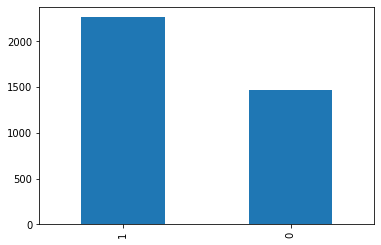

In [222]:
# 부정리뷰 감정리뷰 데이터셋이 고르게 분포함을 확인 
train_data['label'].value_counts().plot(kind = 'bar')


In [223]:
# 데이터 정제 정규식 한글제외한 나머지 모두 제거 

In [224]:
train_data['title'] = train_data['title'].str.replace("[^ㄱ-하-ㅣ가-힣]", "")

C:\Users\crid2\AppData\Local\Temp\ipykernel_3300\1314129026.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['title'] = train_data['title'].str.replace("[^ㄱ-하-ㅣ가-힣]", "")


In [225]:
print('전처리 후 트레인용 샘플의 개수 :',len(train_data))

전처리 후 트레인용 샘플의 개수 : 3732


In [226]:
train_data['title'].replace('', np.nan , inplace=True)
print(train_data.isnull().sum())

title    0
label    0
dtype: int64


In [227]:
test_data.drop_duplicates(subset = ['title'], inplace=True) # 중복 제거
test_data['title'] = test_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['title'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))


전처리 후 테스트용 샘플의 개수 : 1244


C:\Users\crid2\AppData\Local\Temp\ipykernel_3300\1846009122.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['title'] = test_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [228]:
### 토큰화

In [229]:
# 형태소 처리 라이브러리 정의 
okt =  Okt()

In [230]:
# 불용어 : 추가시 리스트에 추가
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [248]:
train_data['tokenized'] = train_data['title'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [249]:
test_data['tokenized'] = test_data['title'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [250]:
# 단어 길이 및 분포 확인하기 

In [289]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [290]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test = test_data['tokenized'].values
y_test = test_data['label'].values

In [291]:
print(X_train , type(X_train))
X_train.shape

[list(['코스피', '내', '린', '장', '종료'])
 list(['국내', '투자자', '美中', '수', '하락', '저', '점', '매', '수로', '대응'])
 list(['셀트리온', '작년', '영업', '이익', '천억원', '재작년', '보다', '상승']) ...
 list(['내년', '공', '모', '주', '최대', '어', '엔', '솔월', '코스피', '상장', '나선다'])
 list(['삼', '전', '분기', '매출', '조원', '넘나', '사상', '최대', '예상'])
 list(['작년', '공', '모', '주', '시', '초가', '매', '도시', '수익률', '올해', '로', '급락'])] <class 'numpy.ndarray'>


(3732,)

In [279]:

# df = pd.DataFrame(sample_train['tokenized'])
# display(df)
# with open('/content/drive/MyDrive/NLP/4_page/X_train.csv', 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f)

In [294]:
df = pd.DataFrame(train_data['tokenized'])
display(df)
with open('X_train.csv', 'w', encoding = 'utf-8-sig') as f:
    df.to_csv(f)


,tokenized
10032,"[코스피, 내, 린, 장, 종료]"
4386,"[국내, 투자자, 美中, 수, 하락, 저, 점, 매, 수로, 대응]"
3297,"[셀트리온, 작년, 영업, 이익, 천억원, 재작년, 보다, 상승]"
7124,"[클릭, 해외, 증시, 종목, 위드, 코로나, 에어비앤비, 사상, 최대, 매출]"
7655,"[국제, 유가, 상승, 하락, 다대, 비는, 연, 자금, 으로]"
...,...
10026,"[분기, 영업, 이익, 천억원, 작년, 동기, 대비, 상승]"
796,"[수협, 은행, 분기, 순, 익, 억, 원, 전, 년, 대비, 상승]"
7046,"[내년, 공, 모, 주, 최대, 어, 엔, 솔월, 코스피, 상장, 나선다]"
8433,"[삼, 전, 분기, 매출, 조원, 넘나, 사상, 최대, 예상]"


In [297]:
X_train = pd.read_csv('X_train.csv')
X_train

,Unnamed: 0,tokenized
0,10032,"['코스피', '내', '린', '장', '종료']"
1,4386,"['국내', '투자자', '美中', '수', '하락', '저', '점', '매', ..."
2,3297,"['셀트리온', '작년', '영업', '이익', '천억원', '재작년', '보다',..."
3,7124,"['클릭', '해외', '증시', '종목', '위드', '코로나', '에어비앤비',..."
4,7655,"['국제', '유가', '상승', '하락', '다대', '비는', '연', '자금'..."
...,...,...
3727,10026,"['분기', '영업', '이익', '천억원', '작년', '동기', '대비', '상승']"
3728,796,"['수협', '은행', '분기', '순', '익', '억', '원', '전', '년..."
3729,7046,"['내년', '공', '모', '주', '최대', '어', '엔', '솔월', '코..."
3730,8433,"['삼', '전', '분기', '매출', '조원', '넘나', '사상', '최대',..."


In [137]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [138]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1
등장 빈도가 1번 이하인 희귀 단어의 수: 1
단어 집합에서 희귀 단어의 비율: 100.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 100.0


In [139]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2


In [140]:
## 재 토큰화 
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [141]:
print(X_train[:3])

[[1]]


In [142]:
print(X_test[:3])

[[1, 1], [1]]


리뷰의 최대 길이 : 1
리뷰의 평균 길이 : 1.0


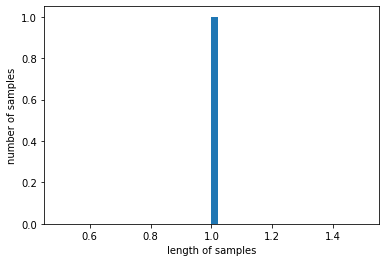

In [143]:
# 패딩 

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [67]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [68]:
max_len = 25
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 100.0


In [69]:
# 리뷰길이 27으로 패딩 

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [70]:
# 자연어 딥러닝 모델 

In [71]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [72]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid')) # 이진분류시 1 , sigmoid 



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('test01_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\losses.py", line 1807, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\crid2\anaconda3\envs\tensor01\lib\site-packages\keras\backend.py", line 5158, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).


In [ ]:
loaded_model = load_model('test01_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
## 리뷰예측하기
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
 sentiment_predict('한온시스템, 전기차 핵심 부품사 치고는 협상력 부족…목표가↓')
    # 화살표를 다시 글자로 바꿔서 넣어야 정확히 판단 가능 

In [ ]:
 sentiment_predict('한온시스템, 전기차 핵심 부품사 치고는 협상력 부족…목표가 하락')